[1, 4, 6, 15, 25, 29, 34, 35, 38, 39]


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:08<00:00,  1.05it/s]


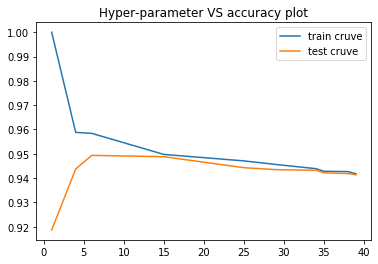

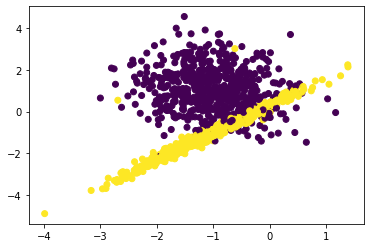

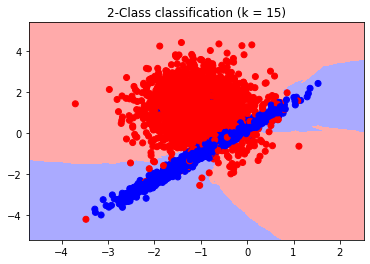

In [7]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
from matplotlib.colors import ListedColormap
warnings.filterwarnings("ignore")

x,y = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=61)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=41)
n1 = len(X_train)

def indices(a):
     indices0 = list(range(0,int(n1/3)))
     indices1 = list(range(int(n1/3),int((2*n1)/3)))
     indices2 = list(range(int((2*n1)/3),n1))
     if a == 0:
           indices_1 = indices0+indices1
           indices_2 = indices2
           return indices_1,indices_2
     elif a == 1:
           indices_1 = indices0+indices2
           indices_2 = indices1
           return indices_1,indices_2
     elif a == 2:
           indices_1 = indices1+indices2
           indices_2 = indices0
           return indices_1,indices_2
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    trainscores = []
    testscores  = [] 
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = [] 
        for j in range(0, folds):
            train_indices,test_indices = indices(j)                
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]                
                            
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores
    
neigh = KNeighborsClassifier()

params = sorted(random.sample(range(1,50),10))
print(params)
folds = 3

trainscores,testscores = RandomSearchCV(X_train, y_train, neigh, params, folds)
 

plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

neigh = KNeighborsClassifier(n_neighbors = 15)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

In [ ]:
#Done